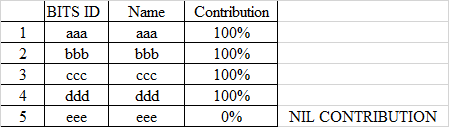



| Sl. No. | BITS ID | Name  | Contribution |
|---------|---------|-------|--------------|
| 1 | 2025AE05126 | VATSAVAYI KAUSHIK CHANDRA VARMA  | 100% |
| 2 | 2025AE05127 | MISHRA RAHUL VIJAYKUMAR AMLESH   | 100% |
| 3 | 2025AE05128 | CHINMAYA KUMAR PANDA             | 100% |
| 4 | 2025AE05129 | ANMOL SINHA                      | 100% |
| 5 | 2025AE05130 | KANKATALA SANDEEP NARAYANA       | 100% |

List all the team members BITS ID ,Name along with % of contribution in this assignment: sample Provided below:

1. &nbsp; 2025AE05126 &nbsp; | &nbsp; VATSAVAYI KAUSHIK CHANDRA VARMA  &nbsp; | &nbsp; 100% &nbsp; | &nbsp;
2. &nbsp; 2025AE05127 &nbsp; | &nbsp; MISHRA RAHUL VIJAYKUMAR AMLESH   &nbsp; | &nbsp; 100% &nbsp; | &nbsp;
3. &nbsp; 2025AE05128 &nbsp; | &nbsp; CHINMAYA KUMAR PANDA             &nbsp; | &nbsp; 100% &nbsp; | &nbsp;
4. &nbsp; 2025AE05129 &nbsp; | &nbsp; ANMOL SINHA                      &nbsp; | &nbsp; 100% &nbsp; | &nbsp;
5. &nbsp; 2025AE05130 &nbsp; | &nbsp; KANKATALA SANDEEP NARAYANA       &nbsp; | &nbsp; 100% &nbsp; | &nbsp;

# Connect-K Game using Min-Max Algorithm with Alpha-Beta Pruning
- The Board class is the data structure that holds the Connect-'K' boards and the game operations
- The Connect-K board is 'w' cells wide and 'h' cells tall in height
- The underlying data structure is a 2-dimensional list or array
- The first dimension is the column; the second dimension is the row
- Every cell in the above list contains either a 0 or a 1. Player 1 is represented by 0 tiles, and Player

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation, PillowWriter
import networkx as nx

## Here we shall define, and accordingly select :

* Player-0 : Human user (manual input)
* Player-1 : Computer (i.e, the A.I Agent algorithm)

In [2]:
#static class variables - shared across all instances
height = width = 0
K = int(input("Enter the no. of consequecutive adjacent elements of same type to be in sequence (horizontally/vertically/diagonally), to ensure winning condition :"))

while True:
    player_0_char = input("Enter character to identify player-0 in Game :")
    player_1_char = input("Enter character to identify player-1 in Game :")
    if player_0_char!=player_1_char:
        break
    else:
        print("\nPlease enter a singular character, unqiue and distinct to identify the 2 players clearly !!!")

while max(height,width) < K :
    print(f"\n\t Kindly ensure that either of the dimensions (height/width) have value of at least '{K}' !!!")
    height = int(input("Enter Height (rows) of the Connect-K Game Board :"))
    width = int(input("Enter Width (columns) of the Connect-K Game Board :"))

Enter the no. of consequecutive adjacent elements of same type to be in sequence (horizontally/vertically/diagonally), to ensure winning condition : 4
Enter character to identify player-0 in Game : H
Enter character to identify player-1 in Game : C



	 Kindly ensure that either of the dimensions (height/width) have value of at least '4' !!!


Enter Height (rows) of the Connect-K Game Board : 7
Enter Width (columns) of the Connect-K Game Board : 6


<hr/>

## Board Environment Parameters

In [3]:
class Board(object):

    def __init__(self, orig=None, hashValue=None):
        self.WIDTH = width
        self.HEIGHT = height
        self.K = K
        
        if orig:
            # Fast copy using list comprehensions
            self.board = [col[:] for col in orig.board]  # Shallow copy of columns
            self.numMoves = orig.numMoves
            self.lastMove = orig.lastMove
            self.hash_cache = None
            return

        elif hashValue:
            self.board = []
            self.numMoves = 0
            self.lastMove = None
            self.hash_cache = hashValue

            digits = []
            while hashValue:
                digits.append(int(hashValue % (K+1)))
                hashValue //= (K+1)

            col = []
            for item in digits:
                if item == K:  # Column separator
                    self.board.append(col)
                    col = []
                else:
                    col.append(item)
                    self.numMoves += 1
            return

        else:
            self.board = [[] for _ in range(self.WIDTH)]
            self.numMoves = 0
            self.lastMove = None
            self.hash_cache = None

    def makeMove(self, column):
        if len(self.board[column]) >= self.HEIGHT:
            return False
            
        piece = self.numMoves % 2
        self.lastMove = (piece, column)
        self.numMoves += 1
        self.board[column].append(piece)
        self.hash_cache = None  # Invalidate cache
        return True

    def children(self):
        """Optimized children generation with move ordering"""
        children = []
        # Center columns first for better alpha-beta pruning
        center = self.WIDTH // 2
        columns = []
        for i in range(self.WIDTH):
            dist = abs(i - center)
            columns.append((dist, i))
        columns.sort()  # Closest to center first
        
        for dist, i in columns:
            if len(self.board[i]) < self.HEIGHT:
                child = Board(orig=self)
                child.makeMove(i)
                children.append((i, child))
        return children

    def isTerminal(self):
        """Optimized terminal check with early returns"""

        
        # Quick check for draw
        if self.isFull():
            return [0, 1], True
            
        # Check only around the last move for efficiency
        if self.lastMove:
            piece, col = self.lastMove
            row = len(self.board[col]) - 1  # Top of the column where piece was placed
            
            # Check all directions from the last move
            if (self.check_direction(col, row, 1, 0) or   # Horizontal
                self.check_direction(col, row, 0, 1) or   # Vertical
                self.check_direction(col, row, 1, 1) or   # +ve Semi-Diagonals /
                self.check_direction(col, row, 1, -1)):   # -ve Anti-Diagonals \
                return [piece], True
                
        return [], False

    def check_direction(self, start_x, start_y, dx, dy):
        """Check for K in a row in given direction from starting position"""
        piece = self.board[start_x][start_y]
        count = 1  # Count the starting piece
        
        # Check positive direction
        for i in range(1, self.K):
            x, y = start_x + i * dx, start_y + i * dy
            if not (0 <= x < self.WIDTH and 0 <= y < len(self.board[x])):
                break
            if self.board[x][y] == piece:
                count += 1
            else:
                break
                
        # Check negative direction  
        for i in range(1, self.K):
            x, y = start_x - i * dx, start_y - i * dy
            if not (0 <= x < self.WIDTH and 0 <= y < len(self.board[x])):
                break
            if self.board[x][y] == piece:
                count += 1
            else:
                break
                
        return count >= self.K

    def hashValue(self):
        """Cached hash value calculation"""
        if self.hash_cache is not None:
            return self.hash_cache
            
        power = 0
        hashValue = 0

        for column in self.board:
            for piece in column:
                hashValue += piece * ((self.K+1) ** power)
                power += 1
            hashValue += self.K * ((self.K+1) ** power)  # Column separator
            power += 1

        self.hash_cache = hashValue
        return hashValue

    def isFull(self):
        return self.numMoves == self.HEIGHT * self.WIDTH

    
    def display(self):
        print()
        
        # Determine if using emojis
        is_emoji = len(player_0_char.encode('utf-8')) > 1 or len(player_1_char.encode('utf-8')) > 1
        
        if is_emoji:
            top_bottom = '+'+((len(list(filter(lambda x: x!=[] and len(x)!=0, self.board)))+1)//2)*'-'+'-'*4+"-"*2*self.WIDTH+'+'
            empty_cell = "  |"
        else:
            top_bottom = '+'+'-'*6+"-" *3* self.WIDTH+'+'
            empty_cell = "   |"
        
        print(top_bottom)

        for rowNum in range(self.HEIGHT - 1, -1, -1):
            row = "|"
            for colNum in range(self.WIDTH):
                if len(self.board[colNum]) > rowNum:
                    player_char = player_1_char if self.board[colNum][rowNum] else player_0_char
                    if is_emoji:
                        row += "" + player_char + "|"
                    else:
                        row += " " + player_char + " |"
                else:
                    row += empty_cell
            print(row)
            print(top_bottom)
        
        # Column numbers
        col_numbers = "  "
        for colNum in range(self.WIDTH):
            col_numbers += f" {colNum+1} " + ("" if is_emoji else " ")
        print(col_numbers)
        
        if self.lastMove:
            last_char = player_1_char if self.lastMove[0] else player_0_char
            print(f"Last move: Player {self.lastMove[0]} -> Column {self.lastMove[1]+1} ('{last_char}')")
        print(f"Move count: {self.numMoves}")

<hr/>

## Player types inheriting from a central class

In [4]:
class Player:
    def __init__(self, iterationsDepthLimit, isInitialStartPlayer, isAI):
        self.isInitialStartPlayer = isInitialStartPlayer
        self.iterationsDepthLimit = iterationsDepthLimit
        self.isAI = isAI
        self.K = K

    def consecutiveElementsEqual(self, Arr, idx1, idx2, freqCount):
    
        def get_value(arr, indices):
            try:
                current = arr
                for idx in indices:
                    current = current[idx]
                return current
            except (IndexError, TypeError):
                return None
        
        def get_direction_vector(start, end):
            direction = []
            for d in range(len(start)):
                diff = end[d] - start[d]
                if diff == 0:
                    direction.append(0)
                else:
                    direction.append(diff // abs(diff))
            return direction
        
        def get_points_along_line(start, end):
            if start == end:
                return [start]
            
            direction = get_direction_vector(start, end)
            points = []
            current = list(start)
            
            # Calculate number of steps needed
            steps = max(abs(end[d] - start[d]) for d in range(len(start)))
            
            for step in range(steps + 1):
                points.append(tuple(current))
                # Move to next point in direction
                current = [current[d] + direction[d] for d in range(len(start))]
            
            return points
        
        # Get all points along the line from idx1 to idx2
        line_points = get_points_along_line(idx1, idx2)
        
        # Get values along the line
        line_values = [get_value(Arr, point) for point in line_points]
        
        # Check if any values are None (out of bounds)
        if any(val is None for val in line_values):
            return False
        
        # Check for exactly 'freqCount' consecutive equal elements
        current_count = max_consecutive = 1
        
        for i in range(1, len(line_values)):
            if line_values[i] == line_values[i-1]:
                current_count += 1
                max_consecutive = max(max_consecutive, current_count)
            else:
                current_count = 1
    
        return max_consecutive == freqCount

    
    def heuristic(self, board):
        """Optimized heuristic with pattern recognition, which acts as our Evaluation function"""
        # Quick terminal check
        terminal = board.isTerminal()
        if terminal[1]:
            if len(terminal[0]) == 1:
                winner = terminal[0][0]
                return 10**4 * (+1 if isAI==isInitialStartPlayer and winner==0 else -1)

            return 0  # Draw

        score = 0
        center_col = board.WIDTH // 2
        
        # Center control bonus
        for i in range(max(0, center_col-1), min(board.WIDTH, center_col+2)):
            if board.board[i]:
                top_piece = board.board[i][-1]
                if top_piece == 0 and self.isAI==self.isInitialStartPlayer:
                    score += 2
                else:
                    score -= 2

        # Check all possible K-length lines
        for i in range(board.WIDTH):
            for j in range(board.HEIGHT):
                # Only check feasible starting positions
                if i <= board.WIDTH - self.K:
                    score += self.evaluate_line(board.board, i, j, 1, 0)
                if j <= board.HEIGHT - self.K:
                    score += self.evaluate_line(board.board, i, j, 0, 1)
                if i <= board.WIDTH - self.K and j <= board.HEIGHT - self.K:
                    score += self.evaluate_line(board.board, i, j, 1, 1)
                if i <= board.WIDTH - self.K and j >= self.K - 1:
                    score += self.evaluate_line(board.board, i, j, 1, -1)

        if getattr(board, 'lastMove', None):
            last_piece, c = board.lastMove
            r = len(board.board[c]) - 1
            start = (c, r)
            for dx, dy in [(1,0),(0,1),(1,1),(1,-1)]:
                # forward and backward K-1 windows from last move
                end_forward = (c+(self.K-2)*dx, r+(self.K-2)*dy)
                end_backward = (c-(self.K-2)*dx, r-(self.K-2)*dy)
                if self.consecutiveElementsEqual(board.board, start, end_forward, self.K-1) or self.consecutiveElementsEqual(board.board, start, end_backward, self.K-1):
                    score += (3000 if last_piece == 0 and self.isAI==self.isInitialStartPlayer else -3500)

        return score

    
    def evaluate_line(self, board, x, y, dx, dy):
        """Evaluate a single line of length K"""
        player_0 = 0
        player_1 = 0
        empty = 0
        BW, BH = len(board), max(len(col) for col in board)
        
        for k in range(self.K):
            nx, ny = x + k * dx, y + k * dy
            if nx < BW and ny < BH and len(board[nx]) > ny:
                piece = board[nx][ny]
                if piece == 0 and self.isAI==self.isInitialStartPlayer:
                    player_0 += 1
                else:
                    player_1 += 1
            else:
                if 0 <= nx < BW and 0 <=ny <BH:
                    empty += 1
                else:
                    return 0
        
        if player_0 > 0 and player_1 > 0:
            return 0  # Blocked line
        
        if player_0 > 0 and self.isAI==self.isInitialStartPlayer:
            return self.score_pattern(player_0, empty)
        elif player_1 > 0:
            return -self.score_pattern(player_1, empty)
        return 0

    def score_pattern(self, count, empty):
        """Score based on threat level"""
        for d in range(K):
            if count == self.K - d and empty == d:
                return d*10**d
        return count

In [5]:
class PlayerMM(Player):
    def __init__(self, iterationsDepthLimit, isInitialStartPlayer):
        super().__init__(iterationsDepthLimit, isInitialStartPlayer, True)

    def findMove(self, board):
        score, move = self.miniMax(board, self.iterationsDepthLimit, self.isInitialStartPlayer)
        return move

    def miniMax(self, board, depth, maximizing):
        terminal = board.isTerminal()
        if terminal[1]:
            if len(terminal[0]) == 1:
                winner = terminal[0][0]
                if winner == 0:
                    return (10000, -1) if maximizing else (-10000, -1)
                else:
                    return (-10000, -1) if maximizing else (10000, -1)
            return (0, -1)
            
        if depth == 0:
            return (self.heuristic(board), -1)

        best_move = -1
        if maximizing:
            best_score = float('-inf')
            for move, child in board.children():
                score, _ = self.miniMax(child, depth-1, False)
                if score > best_score:
                    best_score = score
                    best_move = move
            return (best_score, best_move)
        else:
            best_score = float('inf')
            for move, child in board.children():
                score, _ = self.miniMax(child, depth-1, True)
                if score < best_score:
                    best_score = score
                    best_move = move
            return (best_score, best_move)

In [6]:
class PlayerAB(Player):
    def __init__(self, iterationsDepthLimit, isInitialStartPlayer):
        super().__init__(iterationsDepthLimit, isInitialStartPlayer, True)

    def findMove(self, board):
        score, move = self.alphaBeta(board, self.iterationsDepthLimit, self.isInitialStartPlayer, float('-inf'), float('inf'))
        return move

    def alphaBeta(self, board, depth, maximizing, alpha, beta):
        terminal = board.isTerminal()
        if terminal[1]:
            if len(terminal[0]) == 1:
                winner = terminal[0][0]
                if winner == 0:
                    return (10000, -1) if maximizing else (-10000, -1)
                else:
                    return (-10000, -1) if maximizing else (10000, -1)
            return (0, -1)
            
        if depth == 0:
            return (self.heuristic(board), -1)

        best_move = -1
        children = board.children()
        
        if maximizing:
            best_score = float('-inf')
            for move, child in children:
                score, _ = self.alphaBeta(child, depth-1, False, alpha, beta)
                if score > best_score:
                    best_score = score
                    best_move = move
                alpha = max(alpha, best_score)
                if beta <= alpha:
                    break
            return (best_score, best_move)
        else:
            best_score = float('inf')
            for move, child in children:
                score, _ = self.alphaBeta(child, depth-1, True, alpha, beta)
                if score < best_score:
                    best_score = score
                    best_move = move
                beta = min(beta, best_score)
                if beta <= alpha:
                    break
            return (best_score, best_move)

In [7]:
class ManualPlayer(Player):
    def __init__(self, iterationsDepthLimit, isInitialStartPlayer):
        super().__init__(iterationsDepthLimit, isInitialStartPlayer, False)
        
    def findMove(self, board):
        opts = " "
        for c in range(board.WIDTH):
            opts += " " + (str(c + 1) if len(board.board[c]) < height else ' ') + "  "
        print("\nAvailable columns options :",opts)
        col = input("Place an " + (player_0_char if self.isInitialStartPlayer else player_1_char) + " in column: ")

        while col not in opts:
            print(f"Column is already stacked up and full, or incorrect option beyond (1-{board.WIDTH}) selected !!!\n Use some other columns amongst the available options")
            print("\nAvailable columns options :",opts)
            col = input("Place an " + (player_0_char if self.isInitialStartPlayer else player_1_char) + " in column: ")
        
        return int(col) - 1

<hr/>

## Game Play Run/Execution

In [8]:
class Game:
    def __init__(self, startBoard, player0, player1):
        self.startBoard = startBoard
        self.player0 = player0
        self.player1 = player1
        self.winning_line = []  # Stores winning coordinates [(x1,y1), (x2,y2), ...]
        self.move_coords = []   # Stores all moves in order [(player, x, y), ...]

    def simulateLocalGame(self):
        board = Board(orig=self.startBoard)
        isplayer0 = True

        # Record initial empty board
        self.move_coords.append(tuple([None])*3)  # Game start marker

        while True:
            if isplayer0:
                move = self.player0.findMove(board)
            else:
                move = self.player1.findMove(board)

            board.makeMove(move)
            
            # Store move coordinates (Cartesian: origin at bottom-left)
            player = 0 if isplayer0 else 1
            x = move  # column
            y = len(board.board[move]) - 1  # row (0 at bottom)
            self.move_coords.append((player, x, y))
            
            board.display()

            winner, isOver = board.isTerminal()
            if isOver:
                if len(winner) > 1:
                    print("Game Over: It is a draw!")
                else:
                    print(f"Game Over: Player {winner[0]} wins!")
                    # Find and store winning line coordinates
                break
            else:
                isplayer0 = not isplayer0

        return winner, board
        
        

    def find_winning_line(self, board, player):
        directions = [(1,0), (0,1), (1,1), (1,-1)]  # horizontal, vertical, +ve-diagonal,-ve-diagonal

        for col in range(board.WIDTH):
            for row in range(board.HEIGHT):
                if len(board.board[col]) > row and board.board[col][row] == player:
                    for dx, dy in directions:
                        line = []
                        for i in range(K):
                            x, y = col + i*dx, row + i*dy
                            if 0 <= x < board.WIDTH and 0 <= y < board.HEIGHT and len(board.board[x]) > y and board.board[x][y] == player:
                                line.append((x, y))
                            else:
                                break
                                
                        if len(line) == K:
                            self.winning_line = line
                            return

In [9]:
playerInitialSetterFlag = True
print("\nSelect the type of Players as per below listed options (Default value: 'C', i.e, Manual Player) :-\n\tA. Min-Max algorithm based A.I Agent\n\tB. Alpha-Beta pruning algorithm based A.I Agent\n\tC. Manual Player (Human user)\n")

print()
print(f"Player-0 (plays-'{player_0_char}') :-")
agentPlayerType_0 = input("Select Agent/Player Type from available option (A-C) :")
repetitionThreshold_0 = int(input("Enter iteration depth limit bound :"))
agentPlayerFunction_0 = PlayerMM if agentPlayerType_0.upper() == 'A' else (PlayerAB if agentPlayerType_0.upper() == 'B' else ManualPlayer)

print()
print(f"Player-1 (plays-'{player_1_char}'):-")
agentPlayerType_1 = input("Select Agent/Player Type from available option (A-C) :")
repetitionThreshold_1 = int(input("Enter iteration depth limit bound :"))
agentPlayerFunction_1 = PlayerMM if agentPlayerType_1.upper() == 'A' else (PlayerAB if agentPlayerType_1.upper() == 'B' else ManualPlayer)

print("_"*100)
if __name__ == "__main__":
    gameBoard = Board()
    game = Game(gameBoard, agentPlayerFunction_0(repetitionThreshold_0, playerInitialSetterFlag), agentPlayerFunction_1(repetitionThreshold_1, not playerInitialSetterFlag))
    champion,final_board = game.simulateLocalGame()
    game.find_winning_line(final_board,champion[0] if len(champion)==1 else None)
    print("Player's list of moves (mapped against player number) :",game.move_coords,"with the winning line co-ordinates :",game.winning_line)


Select the type of Players as per below listed options (Default value: 'C', i.e, Manual Player) :-
	A. Min-Max algorithm based A.I Agent
	B. Alpha-Beta pruning algorithm based A.I Agent
	C. Manual Player (Human user)


Player-0 (plays-'H') :-


Select Agent/Player Type from available option (A-C) : C
Enter iteration depth limit bound : 2



Player-1 (plays-'C'):-


Select Agent/Player Type from available option (A-C) : A
Enter iteration depth limit bound : 5


____________________________________________________________________________________________________

Available columns options :   1   2   3   4   5   6  


Place an H in column:  2



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   | H |   |   |   |   |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 2 ('H')
Move count: 1

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   | C |   |   |   |   |
+------------------------+
|   | H |   |   |   |   |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 2 ('C')
Move count: 2

Available columns options :   1   2   3   4

Place an H in column:  4



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   | C |   |   |   |   |
+------------------------+
|   | H |   | H |   |   |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 4 ('H')
Move count: 3

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   | C |   |   |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 3 ('C')
Move count: 4

Available columns options :   1   2   3   4

Place an H in column:  3



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   | C | H |   |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 3 ('H')
Move count: 5

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   | C |   |   |   |
+------------------------+
|   | C | H |   |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 3 ('C')
Move count: 6

Available columns options :   1   2   3   4

Place an H in column:  4



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   | C |   |   |   |
+------------------------+
|   | C | H | H |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 4 ('H')
Move count: 7

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   | C |   |   |   |
+------------------------+
|   | C | H | H |   |   |
+------------------------+
|   | H | C | H |   | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 6 ('C')
Move count: 8

Available columns options :   1   2   3   4

Place an H in column:  1



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   | C |   |   |   |
+------------------------+
|   | C | H | H |   |   |
+------------------------+
| H | H | C | H |   | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 1 ('H')
Move count: 9

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   | C |   |   |   |
+------------------------+
| C | C | H | H |   |   |
+------------------------+
| H | H | C | H |   | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 1 ('C')
Move count: 10

Available columns options :   1   2   3   

Place an H in column:  2



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   | H | C |   |   |   |
+------------------------+
| C | C | H | H |   |   |
+------------------------+
| H | H | C | H |   | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 2 ('H')
Move count: 11

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   | C |   |   |   |
+------------------------+
|   | H | C |   |   |   |
+------------------------+
| C | C | H | H |   |   |
+------------------------+
| H | H | C | H |   | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 3 ('C')
Move count: 12

Available columns options :   1   2   3  

Place an H in column:  4



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   | C |   |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
| C | C | H | H |   |   |
+------------------------+
| H | H | C | H |   | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 4 ('H')
Move count: 13

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   | C | C |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
| C | C | H | H |   |   |
+------------------------+
| H | H | C | H |   | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 4 ('C')
Move count: 14

Available columns options :   1   2   3  

Place an H in column:  5



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   | C | C |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
| C | C | H | H |   |   |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 5 ('H')
Move count: 15

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
|   |   | C | C |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
| C | C | H | H |   |   |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 4 ('C')
Move count: 16

Available columns options :   1   2   3  

Place an H in column:  5



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
|   |   | C | C |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
| C | C | H | H | H |   |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 5 ('H')
Move count: 17

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
|   |   | C | C |   |   |
+------------------------+
|   | H | C | H |   |   |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 6 ('C')
Move count: 18

Available columns options :   1   2   3  

Place an H in column:  5



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
|   |   | C | C |   |   |
+------------------------+
|   | H | C | H | H |   |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 5 ('H')
Move count: 19

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
|   |   | C | C | C |   |
+------------------------+
|   | H | C | H | H |   |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 5 ('C')
Move count: 20

Available columns options :   1   2   3  

Place an H in column:  1



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
|   |   | C | C | C |   |
+------------------------+
| H | H | C | H | H |   |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 1 ('H')
Move count: 21

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
| C |   | C | C | C |   |
+------------------------+
| H | H | C | H | H |   |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 1 ('C')
Move count: 22

Available columns options :   1   2   3  

Place an H in column:  6



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
| C |   | C | C | C |   |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 6 ('H')
Move count: 23

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
| C |   |   | C |   |   |
+------------------------+
| C |   | C | C | C |   |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 1 ('C')
Move count: 24

Available columns options :   1   2   3  

Place an H in column:  2



+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   |   |   |   |
+------------------------+
| C |   |   | C |   |   |
+------------------------+
| C | H | C | C | C |   |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 2 ('H')
Move count: 25

+------------------------+
|   |   |   |   |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
| C |   |   | C |   |   |
+------------------------+
| C | H | C | C | C |   |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 4 ('C')
Move count: 26

Available columns options :   1   2   3  

Place an H in column:  4



+------------------------+
|   |   |   | H |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
| C |   |   | C |   |   |
+------------------------+
| C | H | C | C | C |   |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 4 ('H')
Move count: 27

+------------------------+
|   |   |   | H |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
| C | C |   | C |   |   |
+------------------------+
| C | H | C | C | C |   |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 2 ('C')
Move count: 28

Available columns options :   1   2   3  

Place an H in column:  6



+------------------------+
|   |   |   | H |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
| C | C |   | C |   |   |
+------------------------+
| C | H | C | C | C | H |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 6 ('H')
Move count: 29

+------------------------+
|   |   |   | H |   |   |
+------------------------+
|   |   |   | C |   |   |
+------------------------+
| C | C |   | C |   | C |
+------------------------+
| C | H | C | C | C | H |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 6 ('C')
Move count: 30

Available columns options :   1   2   3  

Place an H in column:  1



+------------------------+
|   |   |   | H |   |   |
+------------------------+
| H |   |   | C |   |   |
+------------------------+
| C | C |   | C |   | C |
+------------------------+
| C | H | C | C | C | H |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 0 -> Column 1 ('H')
Move count: 31

+------------------------+
|   |   |   | H |   |   |
+------------------------+
| H |   |   | C |   |   |
+------------------------+
| C | C | C | C |   | C |
+------------------------+
| C | H | C | C | C | H |
+------------------------+
| H | H | C | H | H | H |
+------------------------+
| C | C | H | H | H | C |
+------------------------+
| H | H | C | H | H | C |
+------------------------+
   1   2   3   4   5   6  
Last move: Player 1 -> Column 3 ('C')
Move count: 32
Game Over: Player 1 wins!
Player's list of

Testing Cartesian coordinate animation...
Generating game history from moves:
Board dimensions: 6x7 (rows x columns)
Total moves: 32
Move 1: Player 0 at (1, 0)
  Success - Column 1 now has pieces at rows: [0]
Move 2: Player 1 at (1, 1)
  Success - Column 1 now has pieces at rows: [0, 1]
Move 3: Player 0 at (3, 0)
  Success - Column 3 now has pieces at rows: [0]
Move 4: Player 1 at (2, 0)
  Success - Column 2 now has pieces at rows: [0]
Move 5: Player 0 at (2, 1)
  Success - Column 2 now has pieces at rows: [0, 1]
Move 6: Player 1 at (2, 2)
  Success - Column 2 now has pieces at rows: [0, 1, 2]
Move 7: Player 0 at (3, 1)
  Success - Column 3 now has pieces at rows: [0, 1]
Move 8: Player 1 at (5, 0)
  Success - Column 5 now has pieces at rows: [0]
Move 9: Player 0 at (0, 0)
  Success - Column 0 now has pieces at rows: [0]
Move 10: Player 1 at (0, 1)
  Success - Column 0 now has pieces at rows: [0, 1]
Move 11: Player 0 at (1, 2)
  Success - Column 1 now has pieces at rows: [0, 1, 2]
Move 

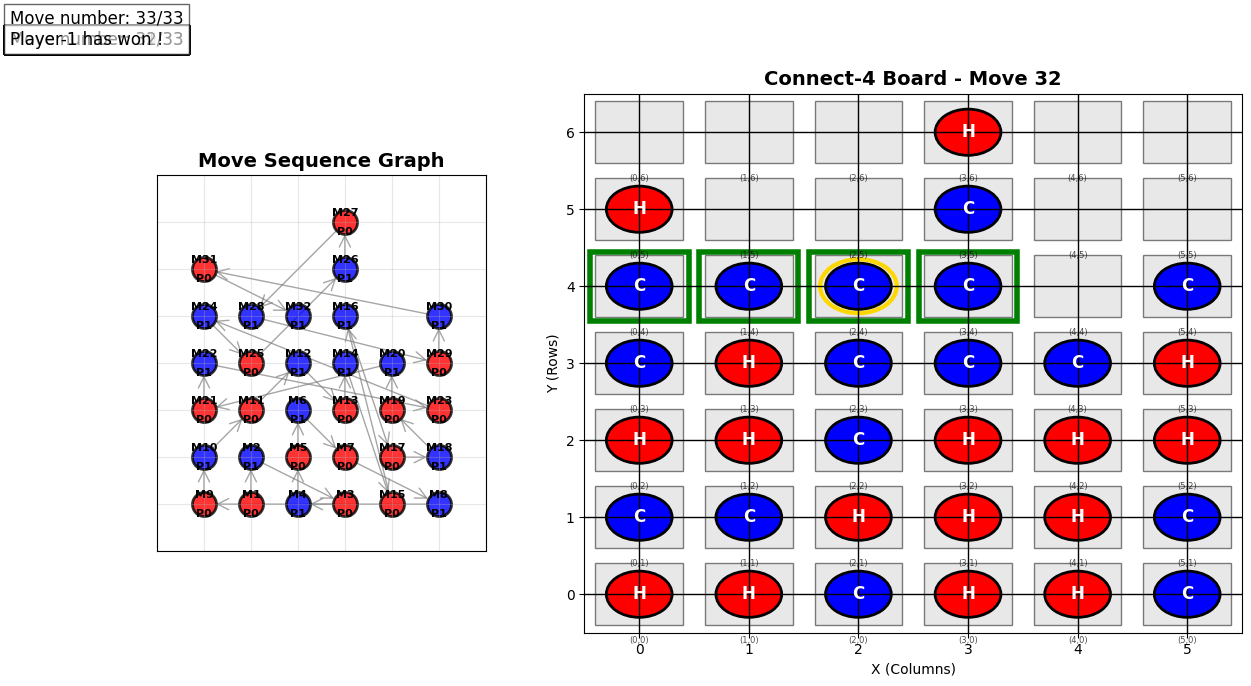

In [10]:
def create_connect_k_animation(game_history):
    """
    Create step-wise animation with Cartesian coordinates (bottom-to-top, left-to-right)
    Origin (0,0) at bottom-left, x increases right, y increases up
    """
    
    fig, (graph_ax, board_ax) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [1, 2]})
    
    # Colors for players
    colors = {0: 'red', 1: 'blue'}
    player_chars = {0: player_0_char, 1: player_1_char}
    
    def update(frame):
        # Clear previous frame
        graph_ax.clear()
        board_ax.clear()
        fig.text(0.02, 0.95, f"Move number: {frame+1}/{len(game_history)}"+((f"\nPlayer-{champion[0]} has won !" if len(champion)==1 else "\nIt's a Draw !") if frame+1==len(game_history) else ""), fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

        # Setup graph axis
        graph_ax.set_title("Move Sequence Graph", fontsize=14, fontweight='bold')
        graph_ax.set_xlim(-1, width)
        graph_ax.set_ylim(-1, height)
        graph_ax.grid(True, alpha=0.3)
        graph_ax.set_aspect('equal')
        
        # Setup board axis
        board_ax.set_xlim(-0.5, width - 0.5)
        board_ax.set_ylim(-0.5, height - 0.5)
        board_ax.set_xticks(range(width))
        board_ax.set_yticks(range(height))
        board_ax.grid(True, color='black', linewidth=1)
        board_ax.set_title(f"Connect-{K} Board - Move {frame}", fontsize=14, fontweight='bold')
        board_ax.set_xlabel("X (Columns)")
        board_ax.set_ylabel("Y (Rows)")
        
        # Get current board state
        current_board = game_history[frame]
        
        # Create NetworkX graph for move sequence
        G = nx.DiGraph()
        
        # Add all moves up to current frame
        for move_num in range(1, frame + 1):  # Start from move 1
            if move_num < len(game_history):
                # Find the move that was made
                prev_board = game_history[move_num - 1]
                curr_board = game_history[move_num]
                
                for col in range(width):
                    if len(curr_board[col]) != len(prev_board[col]):
                        # This is where the move was made
                        row = len(curr_board[col]) - 1  # Bottom-to-top filling
                        player = curr_board[col][row]
                        
                        # Add node for this move (Cartesian coordinates: x=col, y=row)
                        G.add_node(move_num, pos=(col, row), player=player, move_num=move_num)
                        
                        # Add edge from previous move
                        if move_num > 1:
                            G.add_edge(move_num - 1, move_num)
                        break
        
        # Draw graph if we have moves
        if G.number_of_nodes() > 0:
            pos = nx.get_node_attributes(G, 'pos')
            
            # Draw edges
            nx.draw_networkx_edges(G, pos, ax=graph_ax, arrows=True, arrowstyle='->', 
                                 arrowsize=20, edge_color='gray', alpha=0.7)
            
            # Draw nodes with player colors
            for node in G.nodes():
                player = G.nodes[node]['player']
                x, y = pos[node]
                
                # Draw node
                graph_ax.scatter(x, y, s=300, c=colors[player], alpha=0.8, 
                               edgecolors='black', linewidth=2)
                
                # Add move number and player info
                graph_ax.text(x, y + 0.2, f"M{node}", ha='center', va='center', 
                            fontsize=8, fontweight='bold')
                graph_ax.text(x, y - 0.2, f"P{player}", ha='center', va='center',
                            fontsize=8, fontweight='bold')
        
        # Draw board with Cartesian coordinates (bottom-to-top)
        for x in range(width):  # x = column
            for y in range(height):  # y = row (0 at bottom)
                # Draw empty cell at Cartesian coordinate (x, y)
                rect = patches.Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                                       facecolor='lightgray', edgecolor='black', alpha=0.5)
                board_ax.add_patch(rect)
                
                # Draw piece if exists (check from bottom up)
                if len(current_board[x]) > y:  # x=column, y=row from bottom
                    player = current_board[x][y]
                    
                    # Draw piece circle
                    piece = patches.Circle((x, y), 0.3, facecolor=colors[player], 
                                         edgecolor='black', linewidth=2)
                    board_ax.add_patch(piece)

                    # Highlight winning cells
                    if hasattr(game, 'winning_line') and (x, y) in game.winning_line:
                        board_ax.add_patch(patches.Rectangle((x-0.45, y-0.45), 0.9, 0.9, fill=False, edgecolor='green', linewidth=4))

                    
                    # Add player character
                    board_ax.text(x, y, player_chars[player], fontsize=12,
                                ha='center', va='center', color='white', fontweight='bold')
        
        # Highlight last move
        if frame > 0 and frame < len(game_history):
            # Find the last move made
            prev_board = game_history[frame - 1]
            curr_board = game_history[frame]
            
            for col in range(width):
                if len(curr_board[col]) != len(prev_board[col]):
                    row = len(curr_board[col]) - 1
                    # Highlight with gold border
                    highlight = patches.Circle((col, row), 0.35, 
                                             facecolor='none', edgecolor='gold', 
                                             linewidth=3)
                    board_ax.add_patch(highlight)
                    break
        
        # Add coordinate labels
        for x in range(width):
            for y in range(height):
                board_ax.text(x, y - 0.6, f'({x},{y})', ha='center', va='center', fontsize=6, alpha=0.7)

        
        
        return []
    
    # Create animation
    frames = len(game_history)
    ani = FuncAnimation(fig, update, frames=frames, interval=1000, blit=False, repeat=False)
    
    return ani

def generate_game_history_from_moves(moves):
    """
    Generate game history from move coordinates
    moves: list of tuples (player, x, y) where (x,y) are Cartesian coordinates
    x = column (0 to width-1), y = row (0 to height-1) with 0 at bottom
    """
    game_history = []
    
    # Initial empty board - list of columns
    board = [[] for _ in range(width)]
    game_history.append([col[:] for col in board])
    
    print("Generating game history from moves:")
    print(f"Board dimensions: {width}x{height} (rows x columns)")
    print(f"Total moves: {len(moves)}")
    
    for move_num, (player, x, y) in enumerate(moves, 1):
        print(f"Move {move_num}: Player {player} at ({x}, {y})")
        
        # Validate coordinates
        if x < 0 or x >= width:
            print(f"  ERROR: x coordinate {x} out of range [0, {width-1}]")
            continue
        if y < 0 or y >= height:
            print(f"  ERROR: y coordinate {y} out of range [0, {height-1}]")
            continue
        
        # Check if this position is available (bottom-to-top filling)
        if len(board[x]) != y:
            print(f"  ERROR: Cannot place at ({x}, {y}) - column {x} has {len(board[x])} pieces")
            continue
        
        # Add the piece
        board[x].append(player)
        game_history.append([col[:] for col in board])
        
        print(f"  Success - Column {x} now has pieces at rows: {list(range(len(board[x])))}")
    
    print(f"Generated {len(game_history)} game states")
    return game_history

# Test with sample moves in Cartesian coordinates
def test_cartesian_animation():
    
    # Sample moves in Cartesian coordinates: (player, x, y)
    # x = column (0-6), y = row from bottom (0-5)
    moves = game.move_coords[1:]
    
    print("Testing Cartesian coordinate animation...")
    game_history = generate_game_history_from_moves(moves)
    
    try:
        ani = create_connect_k_animation(game_history)
        ani.save('game_connect_k_anim.gif', writer=PillowWriter(fps=0.75), dpi=100)
        print("Cartesian animation saved successfully!")
    except Exception as e:
        print(f"Error: {e}")

# For your specific case with game.move_coords
def create_animation_from_game(game, player_0_char='X', player_1_char='O'):
    """
    Create animation directly from your Game object
    Uses: list(map(lambda x: (x[1:]), game.move_coords[1:]))
    """
    if not hasattr(game, 'move_coords') or len(game.move_coords) < 2:
        print("No move coordinates found in game object")
        return
    
    # Extract moves: (player, x, y) from game.move_coords[1:]
    moves = [coord[1:] for coord in game.move_coords[1:]]  # Skip the first element if it's a marker
    
    # width = game.startBoard.WIDTH
    # height = game.startBoard.HEIGHT
    # K = game.startBoard.K
    
    print(f"Creating animation from game: {width}x{height}, K={K}")
    print(f"Move coordinates: {moves}")
    
    game_history = generate_game_history_from_moves(moves)

if __name__ == "__main__":
    test_cartesian_animation()


<hr/>

![Animated Connect-4 Game](game_connect_k_anim.gif)

#### 